In [103]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras import datasets,layers,models
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
           

In [4]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data() 

In [5]:
x_train.shape 

(50000, 32, 32, 3)

In [6]:
y_train.shape 

(50000, 1)

In [7]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [8]:
y_train=y_train.reshape(-1,)
y_train[:5]  

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
    

In [10]:
def sample_plot(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]]) 

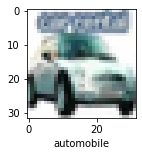

In [11]:
sample_plot(x_train,y_train,40000) 

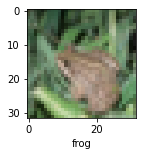

In [12]:
sample_plot(x_test,y_test,4)  

In [14]:
#CReate ANN model 

In [15]:
x_train = x_train / 255
x_test = x_test / 255 

In [18]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [19]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5) 


Epoch 1/5
1563/1563 [==============================] - 68s 43ms/step - loss: 1.8135 - accuracy: 0.3571
Epoch 2/5
1563/1563 [==============================] - 68s 43ms/step - loss: 1.6243 - accuracy: 0.4275
Epoch 3/5
1563/1563 [==============================] - 68s 43ms/step - loss: 1.5418 - accuracy: 0.4579
Epoch 4/5
1563/1563 [==============================] - 68s 44ms/step - loss: 1.4810 - accuracy: 0.4762
Epoch 5/5
1563/1563 [==============================] - 68s 44ms/step - loss: 1.4325 - accuracy: 0.4966


In [20]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 5s 16ms/step - loss: 1.4702 - accuracy: 0.4805


[1.4701651334762573, 0.4805000126361847]

In [21]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print(": confusion_matrix \n", confusion_matrix(y_test, y_pred_classes))
print("Classification Report: \n", classification_report(y_test, y_pred_classes)) 

313/313 [==============================] - 5s 15ms/step
: confusion_matrix 
 [[437  67  54   7   4   5  45  61 206 114]
 [ 11 634   7   5   3   8  18  27  53 234]
 [ 69  49 338  43  40  48 212 121  34  46]
 [ 22  41  81 202  15 114 236 122  49 118]
 [ 46  22 158  26 223  19 245 178  42  41]
 [ 20  31  98 124  26 256 167 153  57  68]
 [  5  22  61  25  31  23 723  40  19  51]
 [ 18  37  36  30  26  31  54 642  23 103]
 [ 52  92  14   6   6   9  18  26 668 109]
 [ 10 168  10   5   3   8  30  41  43 682]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.44      0.52      1000
           1       0.55      0.63      0.59      1000
           2       0.39      0.34      0.36      1000
           3       0.43      0.20      0.27      1000
           4       0.59      0.22      0.32      1000
           5       0.49      0.26      0.34      1000
           6       0.41      0.72      0.53      1000
           7       0.45      0.64 

In [22]:
y_predict=ann.predict(x_test) 
y_predict.shape

313/313 [==============================] - 5s 15ms/step


(10000, 10)

In [27]:
y_classes = [np.argmax(element) for element in y_predict]
y_classes[:5] 

[3, 9, 8, 8, 4]

In [24]:
y_test[:5]


array([3, 8, 8, 0, 6], dtype=uint8)

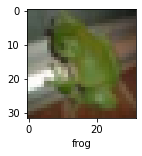

In [35]:
sample_plot(x_test,y_test,7) 


In [34]:
classes[y_classes[7]]

'frog'

In [36]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_classes)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[437,  67,  54,   7,   4,   5,  45,  61, 206, 114],
       [ 11, 634,   7,   5,   3,   8,  18,  27,  53, 234],
       [ 69,  49, 338,  43,  40,  48, 212, 121,  34,  46],
       [ 22,  41,  81, 202,  15, 114, 236, 122,  49, 118],
       [ 46,  22, 158,  26, 223,  19, 245, 178,  42,  41],
       [ 20,  31,  98, 124,  26, 256, 167, 153,  57,  68],
       [  5,  22,  61,  25,  31,  23, 723,  40,  19,  51],
       [ 18,  37,  36,  30,  26,  31,  54, 642,  23, 103],
       [ 52,  92,  14,   6,   6,   9,  18,  26, 668, 109],
       [ 10, 168,  10,   5,   3,   8,  30,  41,  43, 682]])>

Text(69.0, 0.5, 'Truth')

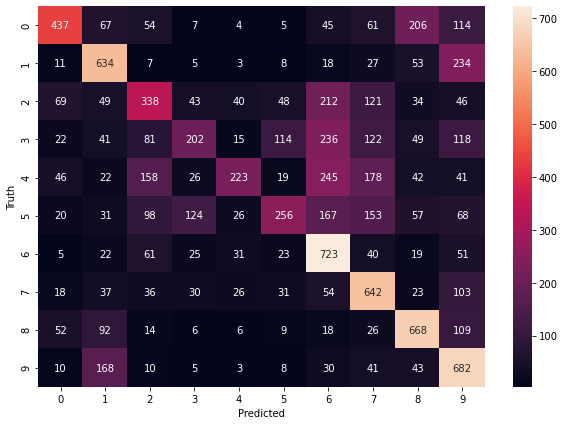

In [37]:
import seaborn as sn 
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [38]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
]) 

In [39]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) 

In [40]:
cnn.fit(x_train, y_train, epochs=5) 

Epoch 1/5
1563/1563 [==============================] - 31s 20ms/step - loss: 1.4540 - accuracy: 0.4762
Epoch 2/5
1563/1563 [==============================] - 32s 21ms/step - loss: 1.1023 - accuracy: 0.6155
Epoch 3/5
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9823 - accuracy: 0.6570
Epoch 4/5
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8983 - accuracy: 0.6884
Epoch 5/5
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8336 - accuracy: 0.7107


In [41]:
cnn.evaluate(x_test,y_test) 

313/313 [==============================] - 2s 7ms/step - loss: 0.9473 - accuracy: 0.6734


[0.9473032355308533, 0.6733999848365784]

In [42]:
y_pred=cnn.predict(x_test)
y_pred[:5] 

313/313 [==============================] - 2s 7ms/step


array([[8.35781638e-03, 1.33644600e-04, 1.79791749e-02, 7.92319715e-01,
        8.81091808e-04, 6.27036244e-02, 4.46988754e-02, 1.10752691e-04,
        7.26541430e-02, 1.61151431e-04],
       [2.51988377e-02, 9.93380025e-02, 1.88220529e-05, 1.01079895e-05,
        6.58843987e-07, 1.43369698e-06, 2.27475084e-07, 2.00182762e-06,
        8.74550521e-01, 8.79384985e-04],
       [9.40379873e-02, 1.20010555e-01, 1.86768663e-03, 4.55370685e-03,
        2.08706988e-04, 8.65097798e-04, 4.22174635e-04, 2.99216801e-04,
        7.59711206e-01, 1.80236753e-02],
       [5.16568601e-01, 1.55291691e-01, 1.23527572e-02, 1.67059209e-02,
        1.60922408e-02, 1.30534347e-03, 8.49139504e-03, 9.21262079e-04,
        2.69352496e-01, 2.91831465e-03],
       [3.73359580e-05, 4.38960978e-06, 4.12314199e-02, 5.25065549e-02,
        6.71923637e-01, 4.97391867e-03, 2.29279548e-01, 2.26151442e-05,
        2.02025294e-05, 3.59394193e-07]], dtype=float32)

In [43]:
np.argmax(y_pred[1]) 

8

In [44]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]  

[3, 8, 8, 0, 4]

In [45]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

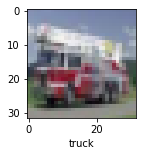

In [46]:
sample_plot(x_test,y_test,89) 

In [47]:
classes[y_classes[89]]     

'truck'

In [48]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print(": confusion_matrix \n", confusion_matrix(y_test, y_pred_classes))
print("Classification Report: \n", classification_report(y_test, y_pred_classes)) 

313/313 [==============================] - 2s 7ms/step
: confusion_matrix 
 [[745  19  39  22   3   5   8  13 109  37]
 [ 28 818   9  18   4   9  12   7  36  59]
 [ 81   4 596  91  41  73  40  49  18   7]
 [ 29  15  83 576  32 163  50  31  12   9]
 [ 31   4 180 115 432  49  48 113  24   4]
 [ 17   5  75 227  11 591  13  52   8   1]
 [ 10   5  73 108  26  44 719   5   9   1]
 [ 22   6  41  72  34  83   4 721   8   9]
 [ 61  34  11  21   2   8   7   7 825  24]
 [ 33 116   8  35   6  20  10  18  43 711]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.74      0.72      1000
           1       0.80      0.82      0.81      1000
           2       0.53      0.60      0.56      1000
           3       0.45      0.58      0.50      1000
           4       0.73      0.43      0.54      1000
           5       0.57      0.59      0.58      1000
           6       0.79      0.72      0.75      1000
           7       0.71      0.72  

In [49]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_classes)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[745,  19,  39,  22,   3,   5,   8,  13, 109,  37],
       [ 28, 818,   9,  18,   4,   9,  12,   7,  36,  59],
       [ 81,   4, 596,  91,  41,  73,  40,  49,  18,   7],
       [ 29,  15,  83, 576,  32, 163,  50,  31,  12,   9],
       [ 31,   4, 180, 115, 432,  49,  48, 113,  24,   4],
       [ 17,   5,  75, 227,  11, 591,  13,  52,   8,   1],
       [ 10,   5,  73, 108,  26,  44, 719,   5,   9,   1],
       [ 22,   6,  41,  72,  34,  83,   4, 721,   8,   9],
       [ 61,  34,  11,  21,   2,   8,   7,   7, 825,  24],
       [ 33, 116,   8,  35,   6,  20,  10,  18,  43, 711]])>

Text(69.0, 0.5, 'Truth')

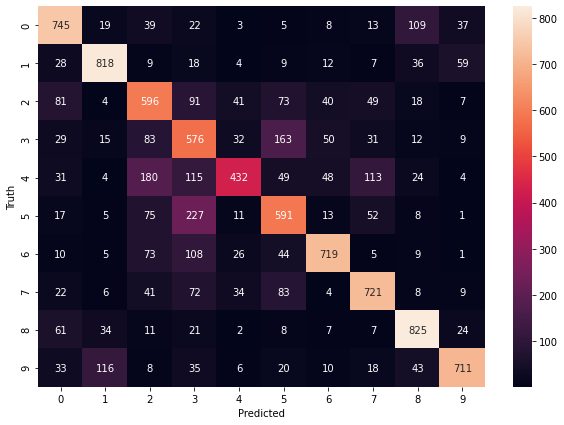

In [50]:
import seaborn as sn 
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
#EXERCISE_FILE

In [115]:
(x_train,y_train),(x_test,y_test)=datasets.mnist.load_data() 

In [116]:
x_train.shape 

(60000, 28, 28)

In [117]:
x_test.shape 

(10000, 28, 28)

In [118]:
Xxtrain_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [119]:
cnn=keras.Sequential([
    layers.Conv2D(30,(3, 3), activation='relu', input_shape=(28, 28,1)),
    layers.MaxPooling2D((2, 2)),
    
    
    
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='sigmoid')
]) 

In [120]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) 

In [121]:
cnn.fit(x_train, y_train, epochs=5) 

Epoch 1/5
1875/1875 [==============================] - 26s 13ms/step - loss: 0.5062 - accuracy: 0.9383
Epoch 2/5
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0764 - accuracy: 0.9768
Epoch 3/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0580 - accuracy: 0.9824
Epoch 4/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0500 - accuracy: 0.9846
Epoch 5/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0403 - accuracy: 0.9870


In [122]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.1102 - accuracy: 0.9750


[0.1101774275302887, 0.9750000238418579]

In [127]:
y_pred=cnn.predict(x_test) 

313/313 [==============================] - 2s 5ms/step


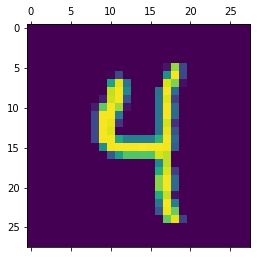

In [146]:
plt.matshow(x_test[170])

In [148]:
np.argmax(y_pred[170]) 

4

In [154]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(x_test)
y_pred = [np.argmax(element) for element in y_pred]
print(": confusion_matrix \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))  

313/313 [==============================] - 2s 5ms/step
: confusion_matrix 
 [[ 969    0    2    1    0    1    2    0    5    0]
 [   0 1123    1    5    0    1    2    1    2    0]
 [   1   23  989    6    2    1    0    7    3    0]
 [   0    0    4 1001    0    0    0    2    3    0]
 [   1    0    0    0  966    0    5    0    1    9]
 [   1    1    1  332    0  551    2    0    3    1]
 [   6    4    1    1    4   22  916    0    3    1]
 [   0    5   12   12    3    0    0  991    1    4]
 [   5    1    4   19    3    0    1    3  935    3]
 [   0    4    1   41    8    4    0    0    5  946]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.97      0.99      0.98      1135
           2       0.97      0.96      0.97      1032
           3       0.71      0.99      0.82      1010
           4       0.98      0.98      0.98       982
           5       0.95      0.62      0.75

In [153]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
cm 

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    2,    1,    0,    1,    2,    0,    5,    0],
       [   0, 1123,    1,    5,    0,    1,    2,    1,    2,    0],
       [   1,   23,  989,    6,    2,    1,    0,    7,    3,    0],
       [   0,    0,    4, 1001,    0,    0,    0,    2,    3,    0],
       [   1,    0,    0,    0,  966,    0,    5,    0,    1,    9],
       [   1,    1,    1,  332,    0,  551,    2,    0,    3,    1],
       [   6,    4,    1,    1,    4,   22,  916,    0,    3,    1],
       [   0,    5,   12,   12,    3,    0,    0,  991,    1,    4],
       [   5,    1,    4,   19,    3,    0,    1,    3,  935,    3],
       [   0,    4,    1,   41,    8,    4,    0,    0,    5,  946]])>

Text(69.0, 0.5, 'Truth')

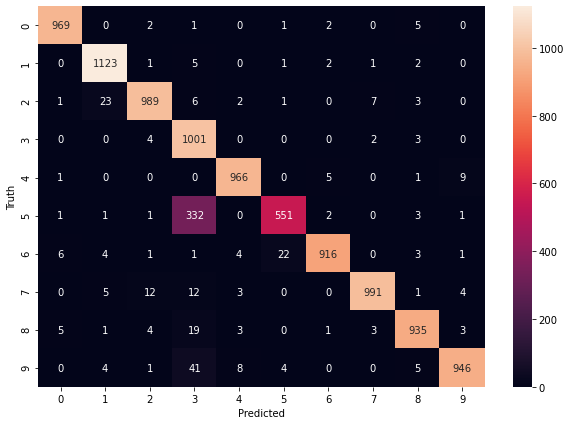

In [155]:
import seaborn as sn 
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")